<a href="https://colab.research.google.com/github/Harishspice/Deep-Learning/blob/main/NNTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 6ms/step - loss: 116230.0625
Epoch 504/3000
2/2 [==============================] - 0s 6ms/step - loss: 116026.7500
Epoch 505/3000
2/2 [==============================] - 0s 6ms/step - loss: 115804.6016
Epoch 506/3000
2/2 [==============================] - 0s 7ms/step - loss: 115569.7109
Epoch 507/3000
2/2 [==============================] - 0s 6ms/step - loss: 115323.9141
Epoch 508/3000
2/2 [==============================] - 0s 6ms/step - loss: 115084.5234
Epoch 509/3000
2/2 [==============================] - 0s 6ms/step - loss: 114855.4219
Epoch 510/3000
2/2 [==============================] - 0s 6ms/step - loss: 114628.5234
Epoch 511/3000
2/2 [==============================] - 0s 6ms/step - loss: 114407.9609
Epoch 512/3000
2/2 [==============================] - 0s 6ms/step - loss: 114162.5234
Epoch 513/3000
2/2 [==============================] - 0s 6ms/step - loss: 113938.1641
Epoch 514/3000
2/2

<ipython-input-6-3a9298e2e1b2>:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The prediction for the given input "+str(prediction_test)+" is:"+str(int(np.round(preds))))


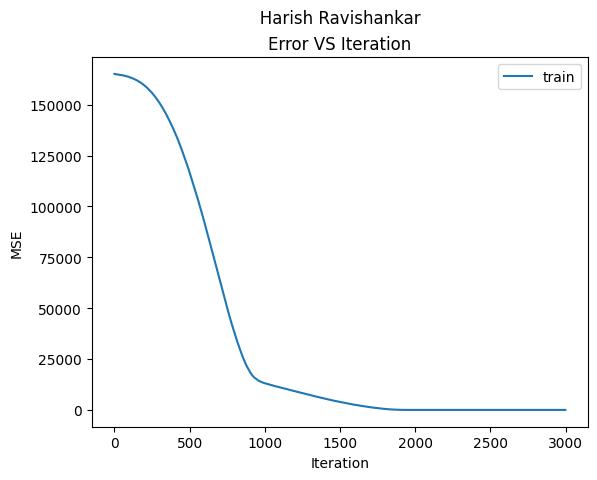

Epoch 1/50
1/1 [==============================] - 0s 492ms/step - loss: 18465.2305
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 18464.4785
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 18463.9297
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 18463.4766
Epoch 5/50
1/1 [==============================] - 0s 13ms/step - loss: 18463.0703
Epoch 6/50
1/1 [==============================] - 0s 15ms/step - loss: 18462.6953
Epoch 7/50
1/1 [==============================] - 0s 14ms/step - loss: 18462.3477
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 18462.0195
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 18461.7031
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 18461.3984
Epoch 11/50
1/1 [==============================] - 0s 8ms/step - loss: 18461.1035
Epoch 12/50
1/1 [==============================] - 0s 8ms/step - loss: 18460.8164
Epoch 13/50
1/1

<Axes: >

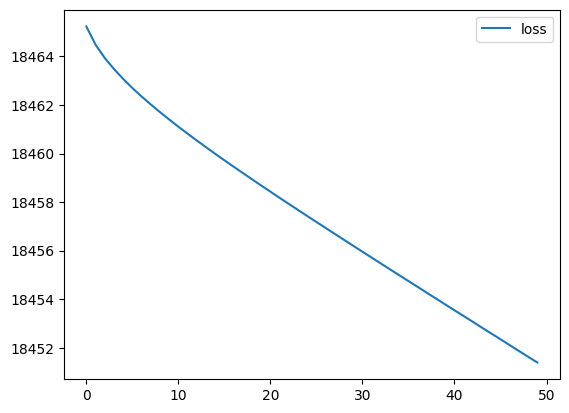

In [6]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('dldata').sheet1


rows = worksheet.get_all_values()


df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})

df.head()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import numpy as np
x=[]
y=[]
for i in range(60):
  num = i+1
  x.append(num)
  y.append(num*12)
df=pd.DataFrame({'INPUT': x, 'OUTPUT': y})
df.head()

inp=df[["INPUT"]].values
out=df[["OUTPUT"]].values
Input_train,Input_test,Output_train,Output_test=train_test_split(inp,out,test_size=0.33)
Scaler=MinMaxScaler()
Scaler.fit(Input_train)
Scaler.fit(Input_test)
Input_train=Scaler.transform(Input_train)
Input_test=Scaler.transform(Input_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([Dense(5,activation='relu'),
                  Dense(10,activation='relu'),
                  Dense(1)])
model.compile(loss="mse",optimizer="rmsprop")
history=model.fit(Input_train,Output_train, epochs=3000,batch_size=32)

prediction_test=int(input("Enter the value to predict:"))
preds=model.predict(Scaler.transform([[prediction_test]]))
print("The prediction for the given input "+str(prediction_test)+" is:"+str(int(np.round(preds))))

model.evaluate(Input_test,Output_test)

import matplotlib.pyplot as plt
plt.suptitle("   Harish Ravishankar")
plt.title("Error VS Iteration")
plt.ylabel('MSE')
plt.xlabel('Iteration')
plt.plot(pd.DataFrame(history.history))
plt.legend(['train'] )
plt.show()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default

worksheet = gc.open('dldata').sheet1
data = worksheet.get_all_values()

dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'INPUT':'float'})
dataset1 = dataset1.astype({'OUTPUT':'float'})

dataset1.head()

X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)


ai_brain = Sequential([
    Dense(3,activation='relu'),
    Dense(4,activation='relu'),
    Dense(1)
])
ai_brain.compile(optimizer='rmsprop',loss='mse')
ai_brain.fit(x=X_train1,y=y_train,epochs=50)

loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()


In [2]:
preds[0]

array([283.53622], dtype=float32)